### Importation des librairies

In [4]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Initalisation du répertoire de travail
Exécuter la cellule et connecter vous à votre compte Google pour commencer
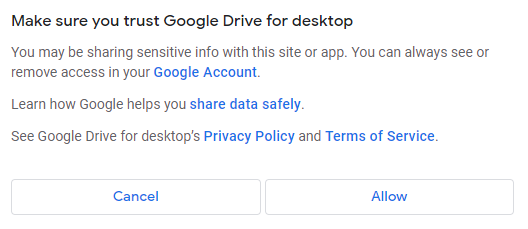

In [ ]:
drive.mount('/content/drive')

# Début du TP

Pour notre TP, nous allons étudier différentes espèces de poissons

| Espèce | Image | poids en g | longueur verticale en cm | longueur diagonale en cm | longueur transversale en cm | hauteur en cm | largeur diagonale en cm |
| :----- | :---: | ----: | -----------------------: | -----------------------: | -----------------------: | -----------------------: | -----------------------: |
| Bream | 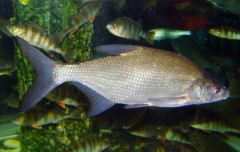| 617 | 30 | 33 | 38 | 15 | 5 |
| Roach | 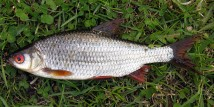 | 152 | 21 | 22 | 25 | 7 | 4 |
| Whitefish| 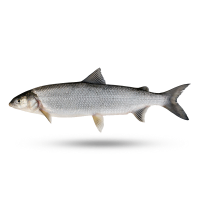 | 531 | 29 | 31 | 34 | 10 | 5 |
| Parkki|| 154 | 19 | 20 | 23 | 9 | 3 |
| Perch|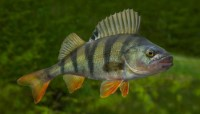| 395 | 26 | 28 | 30 | 8 | 5 |
| Pike|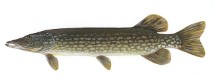| 718 | 42 | 45 | 49 | 8 | 5 |
| Smelt|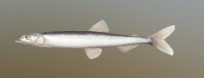| 8,5 | 11 | 12 | 13 | 2 | 1 |

Tout d'abord on doit télécharger notre dataset, et le charger dans une variable pour la manipuler.

In [ ]:
!git clone https://github.com/Bubuclem/introduction_to_ml.git

In [7]:
data=pd.read_csv('/content/introduction_to_ml/Fish.csv')

# Analyse des données

Maintenant nous pouvons regarder nos données.

In [ ]:
data

Pour ce TP nous cherche à entrainer un modèle à détecter une espèce grâce à des dimensions données

Premièrement on peut regarder s'il existe des corrélations entre les différentes valeurs de notre datas et.

On place nos données dans une matrice pour y réaliser des traitements par la suite.

*(On arrondit les données à deux chiffres après la virgule pour y voir plus clair)*

In [9]:
# Comment mettre nos données dans une matrice, pour afficher les corrélations avec un arrondi de 2 chiffres ?
# matrice=data ?

On utilise ensuite Seaborn pour voir les corrélations.

*(On peut utiliser matplotlib.pyplot pour redimensionner l'affichage)*

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
# Trouver un moyen d'afficher les corrélations, en complétant la ligne suivante
# sns. ? (data=matrice, annot=True); 

On voit alors une donnée intéressante, deux valeurs montrent une corrélation.

Pour vérifier nous allons utiliser pairplot pour afficher les points par rapport à nos deux caractéristiques.

In [ ]:
# Comment utiliser pairplot, en complétant la ligne suivante
# sns. ? (data=data[[,]]);

Nous distinguons alors plusieurs familles dans nos données. 

Nous allons donc les exploiter pour que notre modèle apprenne à classifier des espèces de poissons.

# Création de notre modele d'entrainement

Nous mettons nos données dans des axes pour les entrainements.

On retire les espèces de nos colonnes.

In [12]:
X = data.drop(['Species'], axis = 'columns')
Y = data.Species

In [13]:
# Comment utiliser train_test_split, en complétant la ligne suivante ? 
# X_train, X_test, y_train, y_test = ?

Nous allons utiliser un algorithme de classification, **Machine à vecteurs de support**

In [14]:
model = SVC(kernel = 'linear', C = 1)

On entraine notre modèle

In [15]:
model.fit(X_train, y_train) 
svm_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

Une fois entrainer, on affiche dans un graphique si le notre modèle fait des erreurs.

In [ ]:
labels = ['Bream','Roach','Whitefish','Parkki','Perch','Pike','Smelt']

prediction = model.predict(X)
cm=confusion_matrix(Y,prediction)
conf_matrix=pd.DataFrame(data=cm, columns=labels,index=labels)
plt.figure(figsize = (8,5))

# Quel graphique choisir pour représenter la matrice de confusion ?
# ax = sns. ? (conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
ax.set(xlabel='Prédiction', ylabel='Réel');

# Prédictions

Maintenant que notre modèle fonctionne bien, nous pouvons faire des prédictions.

| Species | Weight | Length1 | Length2 | Length3 | Height | Width |
| :------ | :----- | :------ | :------ | :------ | :----- | :-----|
|species name of fish|weight of fish in Gram g|vertical length in cm|diagonal length in cm|cross length in cm|height in cm|diagonal width in cm|
|Bream|617|30|33|38|15|5|
| Roach | 152 | 21 | 22 | 25 | 7 | 4|
| Whitefish | 531 | 29 | 31 | 34 | 10 | 5|
| Parkki | 154 | 19 | 20 | 23 | 9 | 3|
| Perch | 395 | 26 | 28 | 30 | 8 | 5|
| Pike | 718 | 42 | 45 | 49 | 8 | 5|
| Smelt | 8,5 | 11 | 12 | 13 | 2 | 1|

In [ ]:
# Comment réaliser une prédiction ?
# print(model.predict([[ ? ]]))